In [35]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input , train_target) , (test_input , test_target) = keras.datasets.fashion_mnist.load_data()

In [36]:
train_scaled = train_input / 255.0

train_scaled , val_scaled , train_target , val_target = train_test_split(train_scaled , train_target , test_size = 0.2 , random_state = 42)

In [37]:
def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = "softmax"))
  return model



In [38]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
history = model.fit(train_scaled , train_target , epochs = 5 , verbose = 0)


In [40]:
history

In [41]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


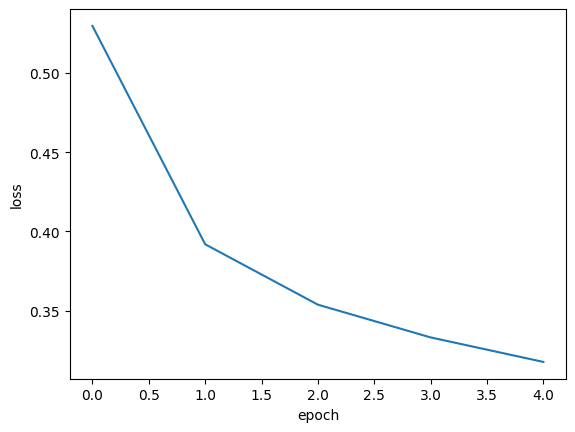

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

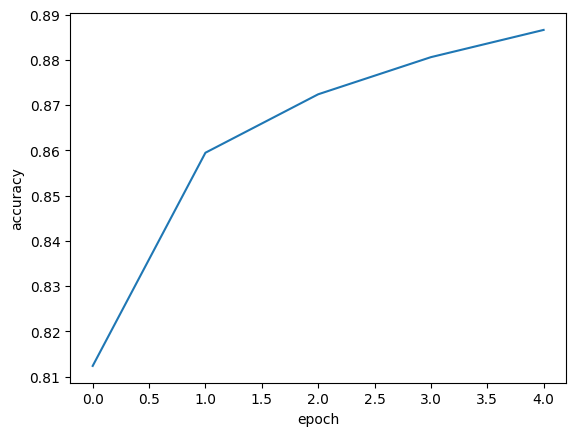

In [43]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [44]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

history = model.fit(train_scaled , train_target , epochs = 20 , verbose = 0)



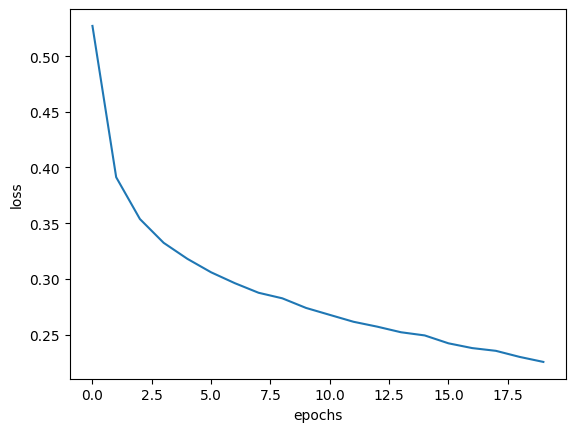

In [45]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [46]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(train_scaled , train_target , epochs = 20, verbose = 0 , validation_data = (val_scaled , val_target))
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


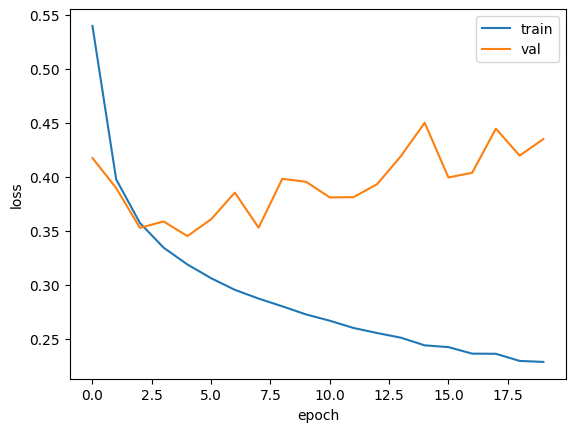

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train" , "val"])
plt.show()

In [48]:
model = model_fn()
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(train_scaled, train_target , epochs = 20 , verbose = 0,
                    validation_data = (val_scaled , val_target))


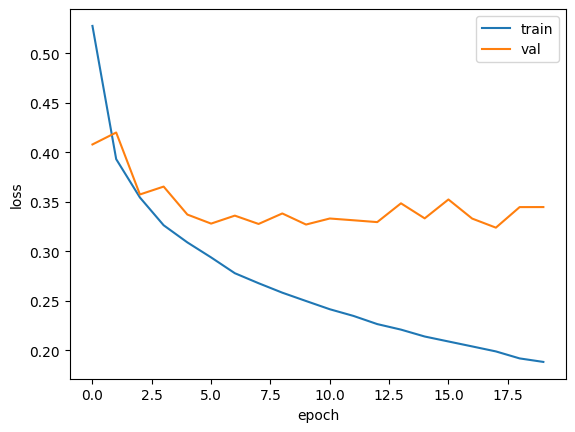

In [49]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [50]:
# Dropout

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

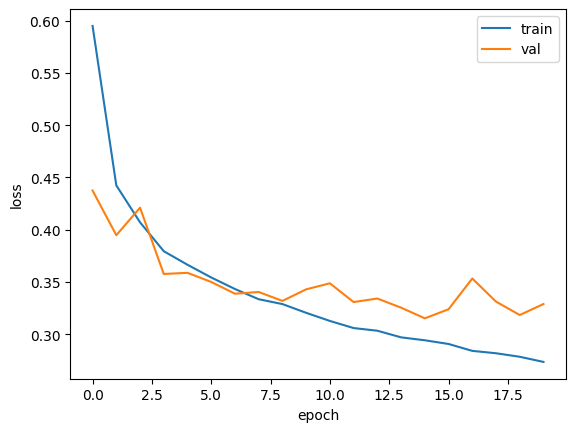

In [51]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(train_scaled, train_target , epochs = 20 , verbose = 0,
                    validation_data = (val_scaled , val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train" , "val"])
plt.show()

In [52]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam" , loss =  "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_scaled , train_target , epochs = 10 , verbose = 0 ,
                    validation_data = (val_scaled , val_target))


In [53]:
model.save_weights("model.weights.h5")
model.save("model-whole.h5")


In [54]:
!ls -al *.h5

-rw-r--r-- 1 root root 976600 Apr 18 04:39 model.weights.h5
-rw-r--r-- 1 root root 978584 Apr 18 04:39 model-whole.h5


In [55]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights("model.weights.h5")

In [56]:
import numpy as np

def accuracy_fn(model , x , y):
  labels = np.argmax(model.predict(x), axis = -1)
  return np.mean(labels == y)

accuracy_fn(model, val_scaled , val_target)





375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


np.float64(0.8799166666666667)

In [57]:
model = keras.models.load_model("model-whole.h5")
model.evaluate(val_scaled , val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.3283


[0.3300562798976898, 0.8799166679382324]

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5" , save_best_only = True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.fit(train_scaled, train_target , epochs = 20 , verbose = 0,
          validation_data = (val_scaled , val_target),
          callbacks = [checkpoint_cb])

In [66]:
model = keras.models.load_model("best-model.h5")

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3109


[0.3134951889514923, 0.8834166526794434]

In [68]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2 , restore_best_weights = True)
history = model.fit(train_scaled, train_target , epochs = 20 , verbose = 0,
                    validation_data = (val_scaled , val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)


6


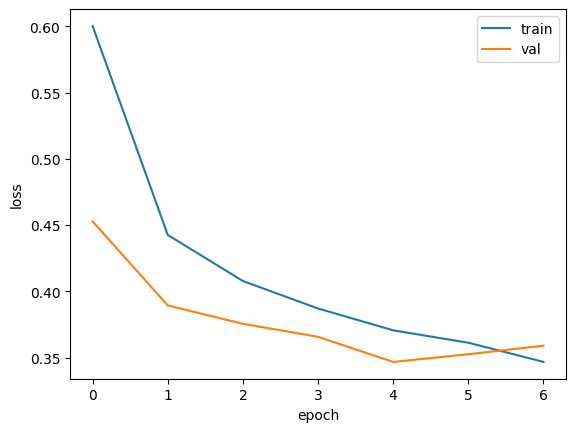

In [70]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [71]:
model.evaluate(val_scaled , val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3455


[0.3467869460582733, 0.8737499713897705]